# Time Series Forecasting

Predict CO2 based on data called "atmospheric CO2 from continuous air samples at the Mauna Loa Observatory, Hawaii, USA", which collected CO2 samples from March 1958 to December 2001.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
from numpy import percentile
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import math
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
data = sm.datasets.co2.load_pandas()
df_co2 = data.data

# Variables
print("{} CO2 samples data points with {} variables each.".format(*df_co2.shape))

2284 CO2 samples data points with 1 variables each.


## Data description

Dataset called “Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.,” which collected CO2 samples from March 1958 to December 2001.

## Explore data

In [4]:
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [5]:
# Check missing value
df_co2.isnull().sum()

co2    59
dtype: int64

## Groups the data in buckets by start of the month

In [6]:
df_co2= df_co2['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
df_co2 = df_co2.fillna(df_co2.bfill())

print(df_co2.head())

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64


## Visualizing a time series

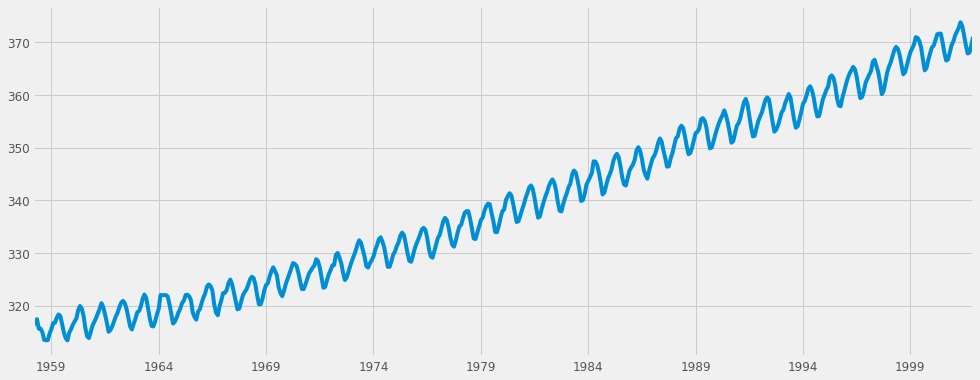

In [7]:
df_co2.plot(figsize=(15, 6))
plt.show()

## Visualize time series decomposition

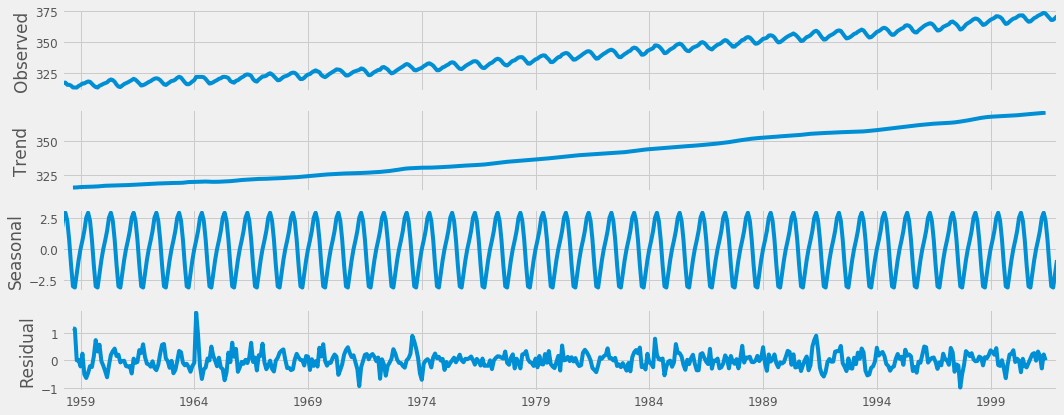

In [8]:
decomposition = sm.tsa.seasonal_decompose(df_co2, model='additive')
fig = decomposition.plot()
plt.show()

## Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

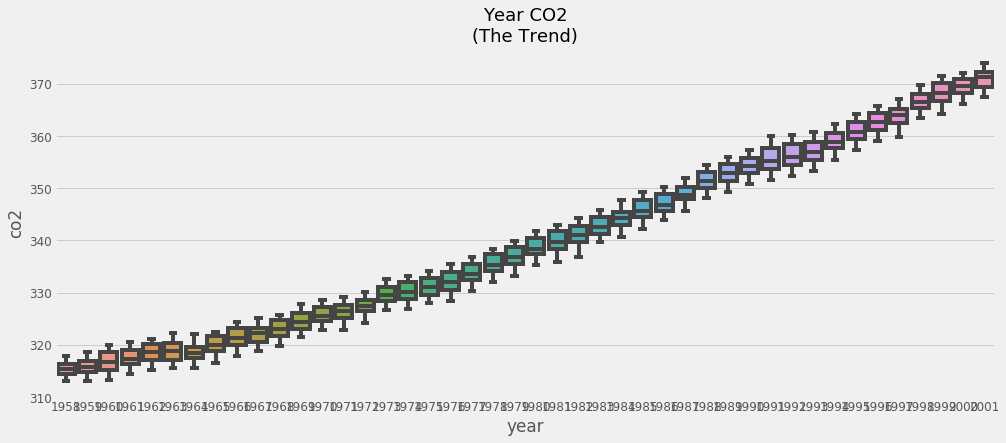

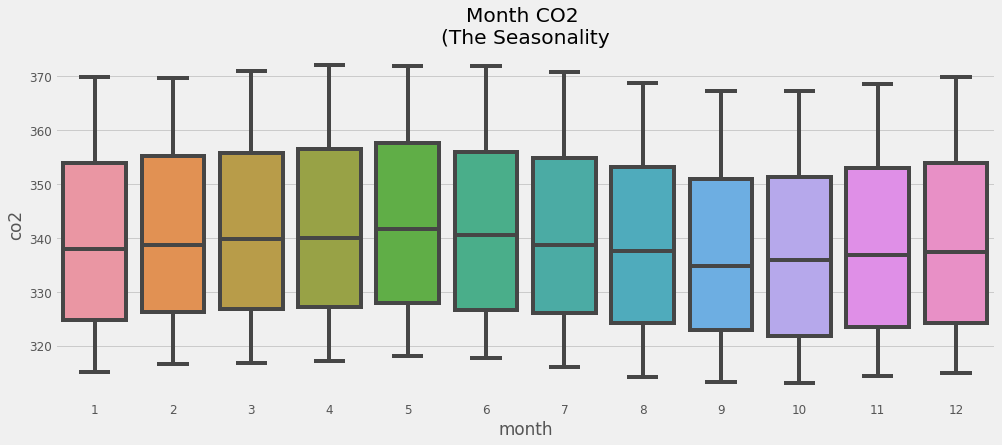

In [9]:
data = sm.datasets.co2.load_pandas()
df = data.data
df.reset_index(inplace=True)

# Prepare year data 
df['year'] = pd.DatetimeIndex(df['index']).year
df['month'] = pd.DatetimeIndex(df['index']).month
years = df['year'].unique()

# Plot Year
sns.boxplot(x='year', y='co2', data=df)
plt.title('Year CO2\n(The Trend)', fontsize=18); 
plt.show()
# Plot Month
sns.boxplot(x='month', y='co2', data=df.loc[~df.year.isin([1958, 2001]), :])
plt.title('Month CO2 \n(The Seasonality')
plt.show()

## Parameter Selection for the ARIMA Time Series Model

In [10]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_co2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624040621
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727642184
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320028
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878474204967
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978073326
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912897385
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755441322
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.66232765914
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.19410673111
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716750756
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1081.2287669258747
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:781.0782225923415
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893630184
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912987982314
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194053
AR

## Fitting an ARIMA Time Series Model

The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 277.78

In [12]:
mod = sm.tsa.statespace.SARIMAX(df_co2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3183      0.092      3.443      0.001       0.137       0.499
ma.L1         -0.6255      0.077     -8.166      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.809      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.634      0.000       0.089       0.106


## Plot diagnostics

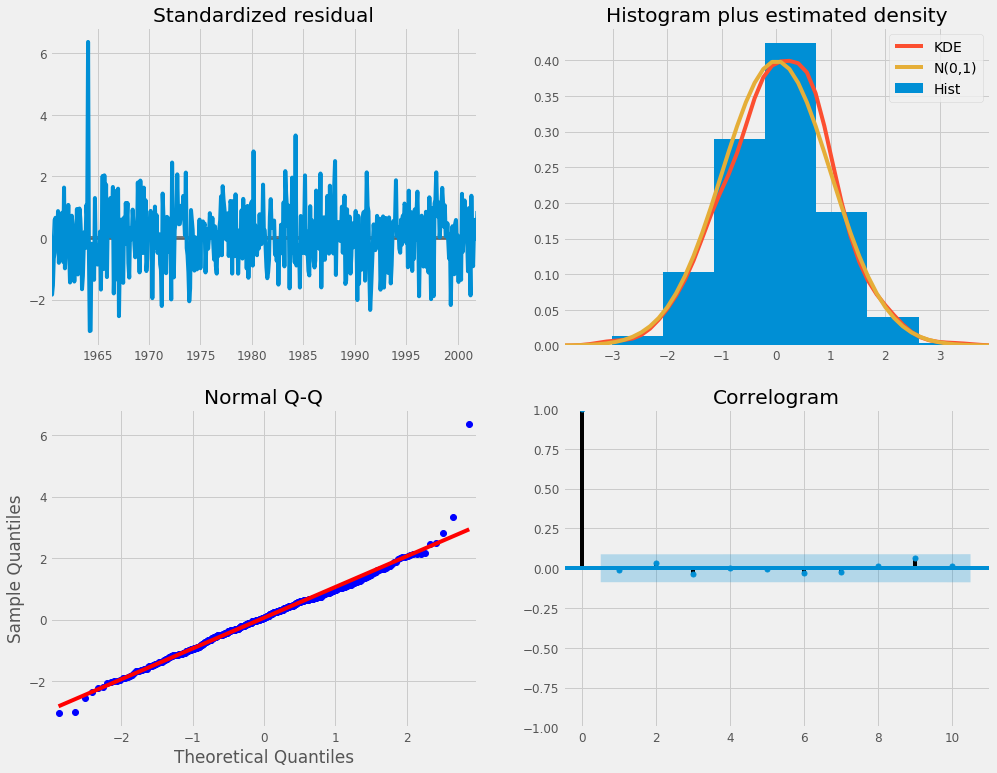

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Validating Forecasts

In [14]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

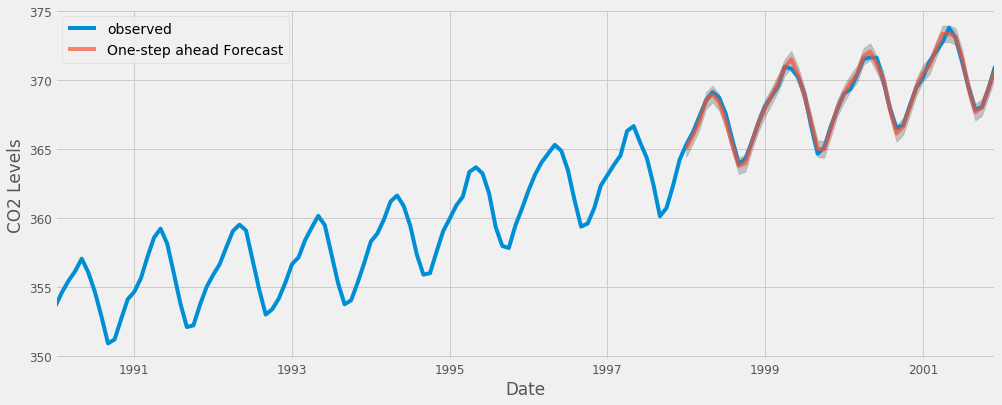

In [15]:
ax = df_co2['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

## Predicting the score

In [16]:
y_forecasted = pred.predicted_mean
y_truth = df_co2['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


## Forecasts

In [17]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

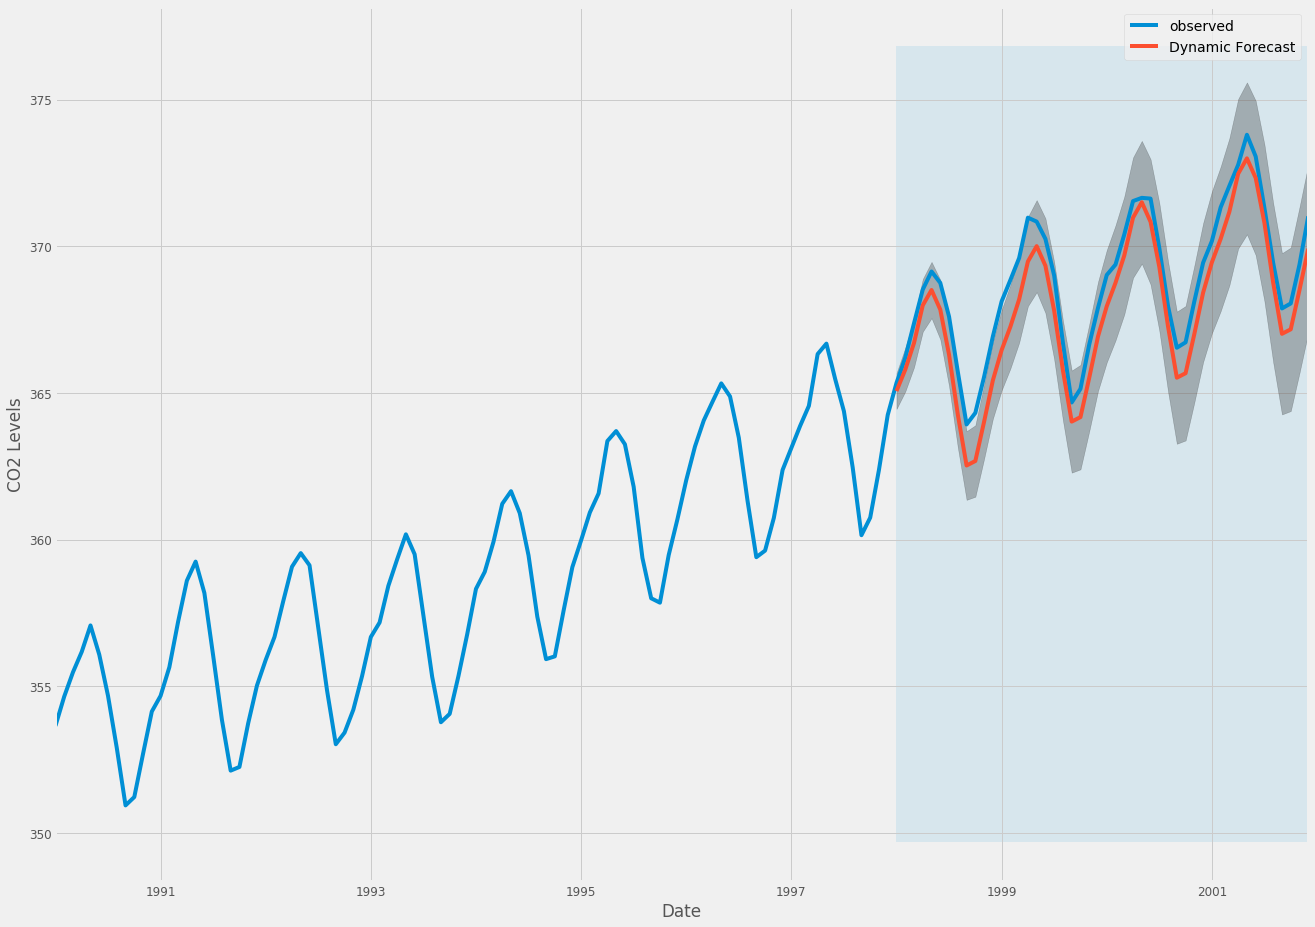

In [18]:
ax = df_co2['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), df_co2.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

## Predictive performance of our forecasts by computing the MSE

In [19]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = df_co2['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


## Producing and Visualizing Forecasts

In [20]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

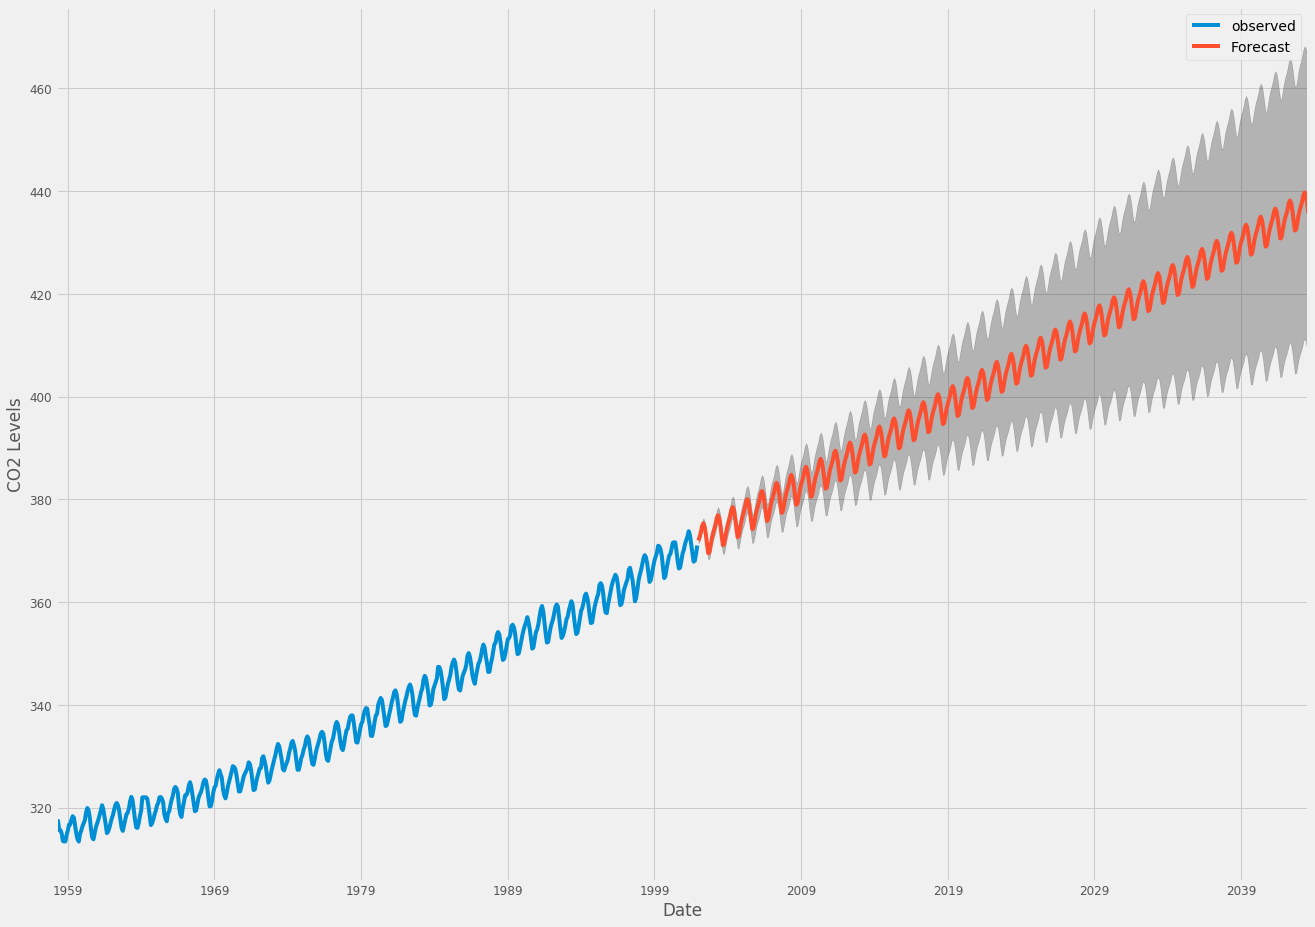

In [21]:
ax = df_co2.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

#Plot
plt.legend()
plt.show()